# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit=pd.read_csv('Fitbit2.csv')
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

In [3]:
# Driver 1 enter codes here

In [4]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [39]:
avg_month = fitbit.pivot_table(index=['Months_encoded', 'Months'])[['Steps']]
display(avg_month)

,,Steps
Months_encoded,Months,
1,January,9892.064516
2,February,8922.866667
3,March,10312.935484
4,April,13079.033333
5,May,10620.096774
6,June,12536.166667
7,July,9193.322581
8,August,11584.774194
9,September,9191.333333


Text(0, 0.5, 'Steps per month')

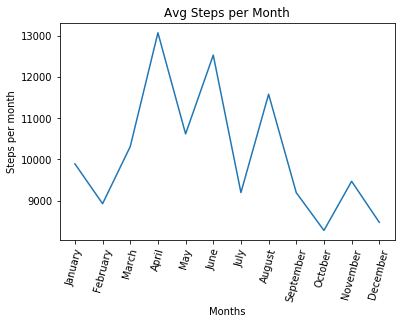

In [63]:
x = avg_month.reset_index()["Months"]
y = avg_month.reset_index()["Steps"]
plt.plot(x,y)

plt.xticks(rotation="75")
plt.title('Avg Steps per Month')
plt.xlabel('Months')
plt.ylabel('Steps per month')

Text(0.5, 0, 'Months')

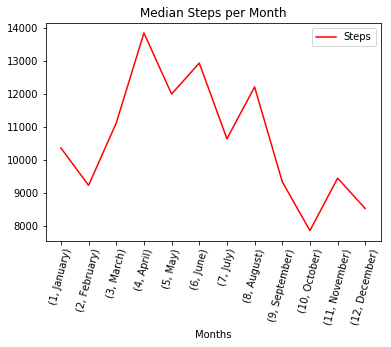

In [8]:
# Calculo de la mediana, segunda parte. 
median_month = fitbit.pivot_table(index=['Months_encoded', 'Months'],
                                  aggfunc=np.median)[['Steps']]

median_month.plot(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], rot=75, color='red')
plt.title('Median Steps per Month')
plt.xlabel('Months')
# avg_month.plot()

In [9]:
median_month.index

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2]],
           names=['Months_encoded', 'Months'])

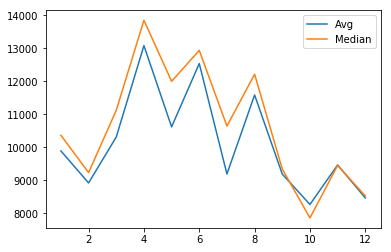

In [10]:
# combo
median_month = fitbit.pivot_table(index='Months_encoded',aggfunc=np.median)[['Steps']]
avg_month = fitbit.pivot_table(index='Months_encoded',aggfunc=np.mean)[['Steps']]


x = median_month.index
z = median_month['Steps']
y = avg_month['Steps']

f, ax = plt.subplots()

ax.plot(x,y)
ax.plot(x,z)

plt.legend(('Avg', 'Median'))

In [11]:
# Work_or_Weekend

# 1 = l-v
# 0 = s,d

# las Activity Calories son una función derivada de diferentes actividades: 
# alta, media, baja, etc... que calcula la app

cal_calorias = fitbit.pivot_table(index='Work_or_Weekend')
cal_calorias

,Activity Calories,Calorie burned,Days_encoded,Distance,Distance_miles,Floors,Hours Sleep,LengthOfRestInMinutes,Minutes Fairly Active,Minutes Lightly Active,Minutes Sedentary,Minutes Very Active,MinutesOfBeingAwake,MinutesOfSleep,Months_encoded,NumberOfAwakings,Sleep efficiency,Steps,Yesterday_sleep,Yesterday_sleep_efficiency
Work_or_Weekend,,,,,,,,,,,,,,,,,,,,
0,1901.523810,2647.628571,5.495238,8.175619,5.080093,6.885714,4.458254,297.523810,22.628571,263.419048,530.831171,30.638095,26.895238,267.495238,6.447619,15.609524,74.683679,10064.238095,4.606190,75.650482
1,2101.305344,2779.122137,2.015267,8.698817,5.405192,13.664122,4.994847,330.889313,27.580153,225.580153,577.201076,37.759542,28.454198,299.690840,6.522901,16.431298,77.035729,10144.572519,4.903626,76.307944


In [12]:
print(cal_calorias['Activity Calories'][1]- cal_calorias['Activity Calories'][0])

199.78153398764061


## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

Text(0.5, 0, 'Steps')

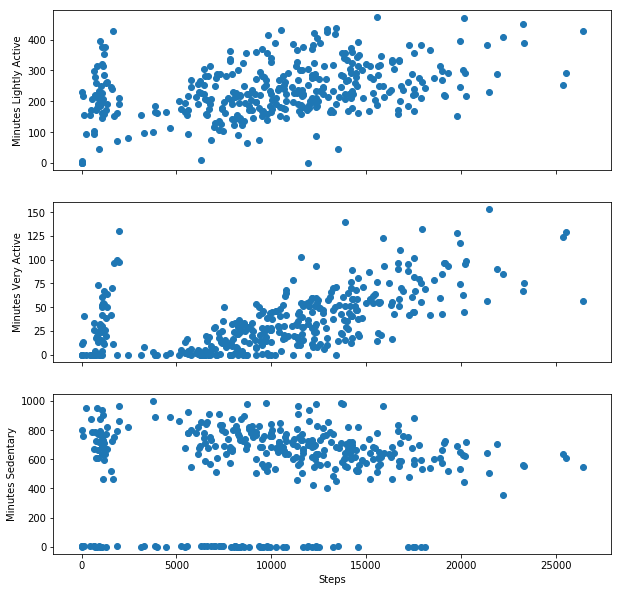

In [15]:
# Driver 2 enter codes here

x = 'Steps'
ys = ["Minutes Lightly Active", 'Minutes Very Active', 'Minutes Sedentary']

fig,ax = plt.subplots(len(ys), figsize=(10, 10),sharex=True)

for i in range(len(ys)):
    ax[i].scatter(fitbit[x], fitbit[ys[i]])   
    ax[i].set_ylabel(ys[i])

ax[i].set_xlabel(x)